<a href="https://colab.research.google.com/github/SreekarPisupati/6Compaines30Days/blob/main/Project_Stock_Price_Prediction_and_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction and Portfolio Optimization*

##Abstract



###Briefing:
The project involves predicting stock prices using historical data and optimizing an investment portfolio based on the predictions. The goal is to assist investors in making informed decisions by providing predictions for individual stocks and optimizing their portfolio for risk and return.

###Prediction Mechanism
The project employs deep learning methodologies, specifically Long Short-Term Memory (LSTM) networks, to predict future stock prices. Historical stock price data is preprocessed and engineered to create relevant features, such as moving averages and technical indicators. The LSTM model is trained on this enriched dataset, enabling it to learn intricate patterns and relationships within the stock prices.

###Dataset Utilized
The project leverages data obtained directly from [Yahoo Finance](https://finance.yahoo.com/screener), a trusted and accessible source known for its reliability and comprehensive historical stock price coverage. The dataset, drawn dynamically from the market, offers real-time insights for Stock Price Prediction and Portfolio Optimization. Although there is no specific dataset name, a link to a sample dataset is provided for reference.
Apple Dataset: https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch


##Imports


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

##Dataset

In [ ]:
#Gets Direct Input

print('Make a Choice:')
print('1 -> Check Stock Portfolio')
print('2 -> Check Stock Price')
quest = int(input("Enter your choice: "))
print("Stocks: Apple('AAPL'), Microsoft('MSFT'), Accenture('ACN'), Infosys('INFY')")

if (quest != 1 & quest != 2):
  print("The choice isn't from the given option")
  exit()

stocknum = 1 # int(input("Enter Stock Number "))
portfolio  = []
for i in range (stocknum):
  stock = input("Stock name: ")
  portfolio.append(stock)
portfolio

if (quest==1):
  stock_count = int(input('Number Of Stocks Bought: '))
  open_price = float(input('Price at which the stock was bought: '))



Make a Choice:
1 -> Check Stock Portfolio
2 -> Check Stock Price
Enter your choice: 1
Stocks: Apple('AAPL'), Microsoft('MSFT'), Accenture('ACN'), Infosys('INFY')
Stock name: AAPL
Number Of Stocks Bought: 12
Price at which the stock was bought: 134


In [ ]:
#Gets File Input
# For File Input name the File as "Portfolio.xlsx" before uploading to runtime environment        RG
# ------------------------------ GET EITHER DIRECT INPUT OR FILE INPUT BUT NOT BOTH ------------------------------------ #      AK
# --------------- PREFER DIRECT INPUT FOR REDUCED HUMAN INTERACTION AND MORE INDUSTRY RELEVANT DATA -------------------- #      AK

from ast import While
portfoliofile = 'Portfolio.xlsx'
portfoliodf = pd.read_excel(portfoliofile)
snum = portfolio.shape[1]
sname = []
row_index = 0
for i in range (snum):
  scode = portfoliodf.at[row_index,'Stock Code']
  row_index+=1
  sname.append(scode)
snum
sname

In [ ]:
# Data Capture from YFinance
cdate = datetime.now().date()
sdate = cdate - timedelta(days=5475)
edate = cdate - timedelta(days=1)

#When using File input      RG
#stock_symbol = sname

#When using Direct Input      RG
stock_symbol = portfolio

start_date = sdate.strftime("%Y-%m-%d")
end_date = edate.strftime("%Y-%m-%d")
datadf = yf.download(stock_symbol, start=start_date, end=end_date)
dataresetdf = datadf.reset_index()
datadf
datadf['Date'] = datadf.index.strftime('%Y-%m-%d')
datadf

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2009-04-29,4.458929,4.530357,4.422500,4.469286,3.783695,458110800,2009-04-29
2009-04-30,4.507857,4.535714,4.461429,4.493929,3.804557,498489600,2009-04-30
2009-05-01,4.492857,4.569643,4.492857,4.544286,3.847189,397516000,2009-05-01
2009-05-04,4.580000,4.723214,4.560000,4.716786,3.993229,609358400,2009-05-04
2009-05-05,4.705357,4.745000,4.682857,4.739643,4.012579,398255200,2009-05-05
...,...,...,...,...,...,...,...
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200,2024-04-17
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900,2024-04-18
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100,2024-04-19


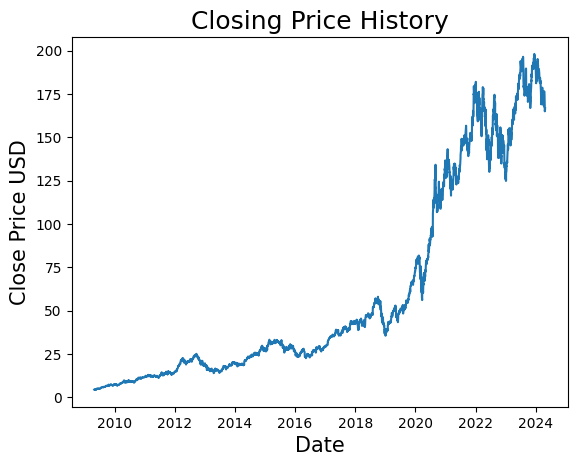

In [ ]:
#Test 1
import matplotlib.pyplot as plt
plt.title('Closing Price History', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD', fontsize=15)
plt.plot(datadf.index, datadf['Close'])

In [ ]:
#Checkpoint 1
df = datadf[['Date','Close']]
df
#You can notice we have two Date columns, the first column is taken as index and the second column is the Date Column corresponding to our data from YFinance

,Date,Close
Date,,
2009-04-29,2009-04-29,4.469286
2009-04-30,2009-04-30,4.493929
2009-05-01,2009-05-01,4.544286
2009-05-04,2009-05-04,4.716786
2009-05-05,2009-05-05,4.739643
...,...,...
2024-04-17,2024-04-17,168.000000
2024-04-18,2024-04-18,167.039993
2024-04-19,2024-04-19,165.000000


In [ ]:
#Function to Datatype of Date from Object to DateTime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime(year=year, month=month, day=day)

In [ ]:
#Converting DataType of Date
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-24-485a854bf74a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


Date
2009-04-29   2009-04-29
2009-04-30   2009-04-30
2009-05-01   2009-05-01
2009-05-04   2009-05-04
2009-05-05   2009-05-05
                ...    
2024-04-17   2024-04-17
2024-04-18   2024-04-18
2024-04-19   2024-04-19
2024-04-22   2024-04-22
2024-04-23   2024-04-23
Name: Date, Length: 3772, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2009-04-29,4.469286
2009-04-30,4.493929
2009-05-01,4.544286
2009-05-04,4.716786
2009-05-05,4.739643
...,...
2024-04-17,168.000000
2024-04-18,167.039993
2024-04-19,165.000000


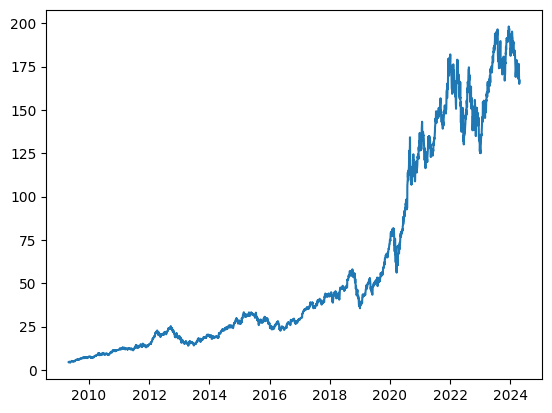

In [ ]:
#Test 2
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Need to set dynamic function   AK
windowed_df = df_to_windowed_df(df,
                                '2023-01-25',
                                '2024-02-14',
                                n=3)
windowed_df

,Target Date,Target3,Target2,Target1,Target
0,2023-01-25,137.869995,141.110001,142.529999,141.860001
1,2023-01-26,141.110001,142.529999,141.860001,143.960007
2,2023-01-27,142.529999,141.860001,143.960007,145.929993
3,2023-01-30,141.860001,143.960007,145.929993,143.000000
4,2023-01-31,143.960007,145.929993,143.000000,144.289993
...,...,...,...,...,...
261,2024-02-08,187.679993,189.300003,189.410004,188.320007
262,2024-02-09,189.300003,189.410004,188.320007,188.850006
263,2024-02-12,189.410004,188.320007,188.850006,187.149994
264,2024-02-13,188.320007,188.850006,187.149994,185.039993


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((266,), (266, 3, 1), (266,))

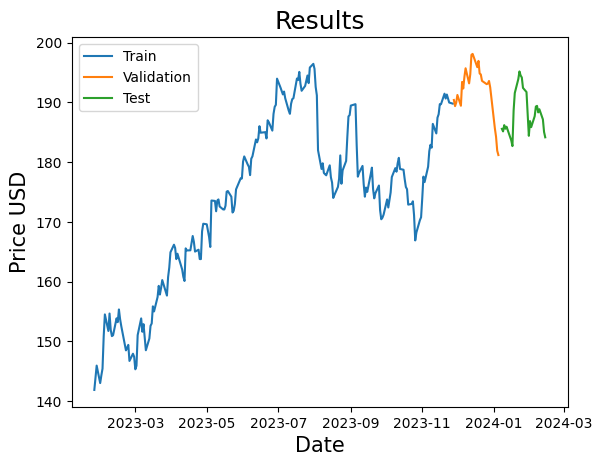

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
plt.title('Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
#print(X_train)
#print(y_train)
plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 132ms/step - loss: 30052.0039 - mean_absolute_error: 172.8031 - val_loss: 36765.4570 - val_mean_absolute_error: 191.6915
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 29897.0781 - mean_absolute_error: 172.3544 - val_loss: 36566.2188 - val_mean_absolute_error: 191.1711
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 29692.0156 - mean_absolute_error: 171.7583 - val_loss: 36302.7578 - val_mean_absolute_error: 190.4808
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 29453.2363 - mean_absolute_error: 171.0617 - val_loss: 36031.0938 - val_mean_absolute_error: 189.7663
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 29202.2266 - mean_absolute_error: 170.3236 - val_loss: 35735.7656 - val_mean_absolute_error: 188.9866
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 28906.1699 - mean_absolute_error: 169.4540 - val_loss: 35

7/7 [==============================] - 1s 5ms/step


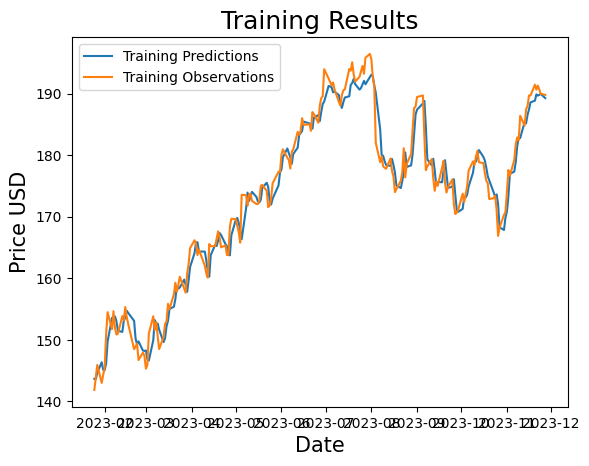

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.title('Training Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 23ms/step


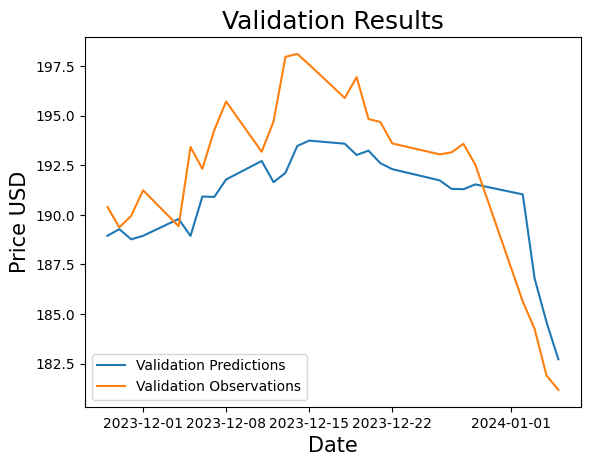

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.title('Validation Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 25ms/step


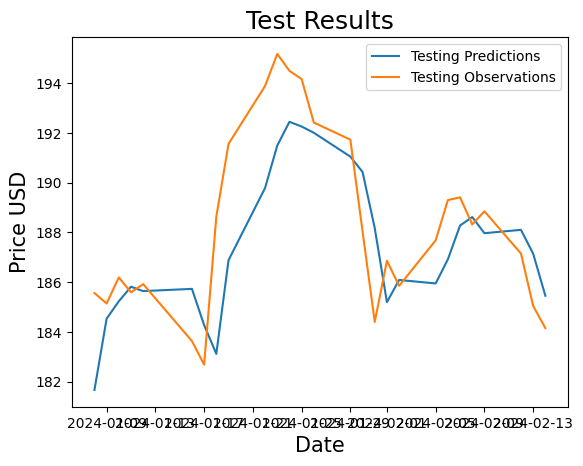

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.title('Test Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.legend(['Testing Predictions', 'Testing Observations'])

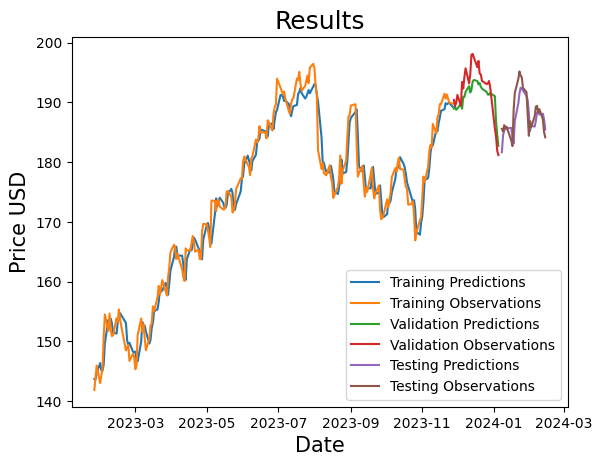

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.title('Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


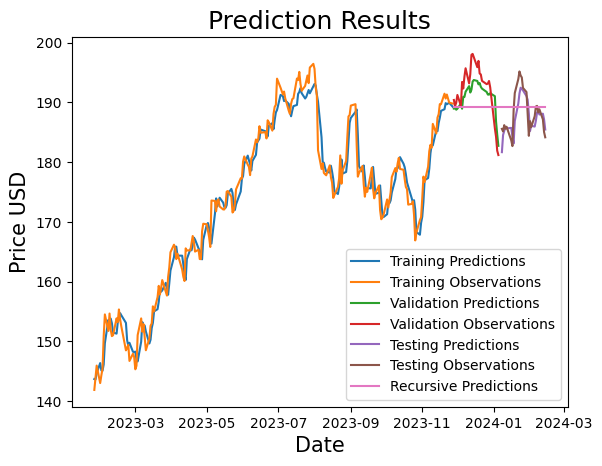

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.title('Prediction Results', fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price USD', fontsize=15)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
#Price & Judgement
x_values = recursive_dates
y_values = recursive_predictions

is_upward_trend = all(y_values[i] <= y_values[i+1] for i in range(len(y_values)-1))
is_downward_trend = all(y_values[i] >= y_values[i+1] for i in range(len(y_values)-1))
#--Start--
row_index = -1
col_name = 'Close'
price = df.iloc[row_index,df.columns.get_loc(col_name)]
#--End--
if is_upward_trend:
    res = 'Good Growth'
elif is_downward_trend:
    res = "Bad Growth"
else:
    res = "Market trend unpredictable"

In [ ]:
#Price Calculation Model
bp = open_price*stock_count
cp = price*stock_count

varprice = cp - bp
percentage = (varprice/ abs(bp)) * 100

if (quest==1):
  print('Stocks were bought at: ', bp)
  print('Current Stocks Price: ', cp)
  print(f"Profit/ Loss Percentage: {percentage:.2f}%")
  print('Future Growth Trend: ', res)


Stocks were bought at:  1200.0
Current Stocks Price:  1823.0999755859375
Profit/ Loss Percentage: 51.92%
Future Growth Trend:  Good Growth
